In [ ]:
import pandas as pd
import os
os.chdir('/Users/ramupadhyay')
df=pd.read_csv('Desktop/traintitanic.csv')
df.head()

In [2]:
p=df['Survived']
df=df.drop(['Cabin','Ticket','Survived','Name'],axis='columns')

In [3]:
from sklearn.preprocessing import LabelEncoder as le
lsex=le()
lemb=le()
lname=le()
df['Sex']=lsex.fit_transform(df['Sex'])
df['Embarked']=lemb.fit_transform(df['Embarked'])
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [4]:
from sklearn.tree import DecisionTreeClassifier as dc
model=dc(max_depth=3, random_state=42)
model.fit(df,p)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


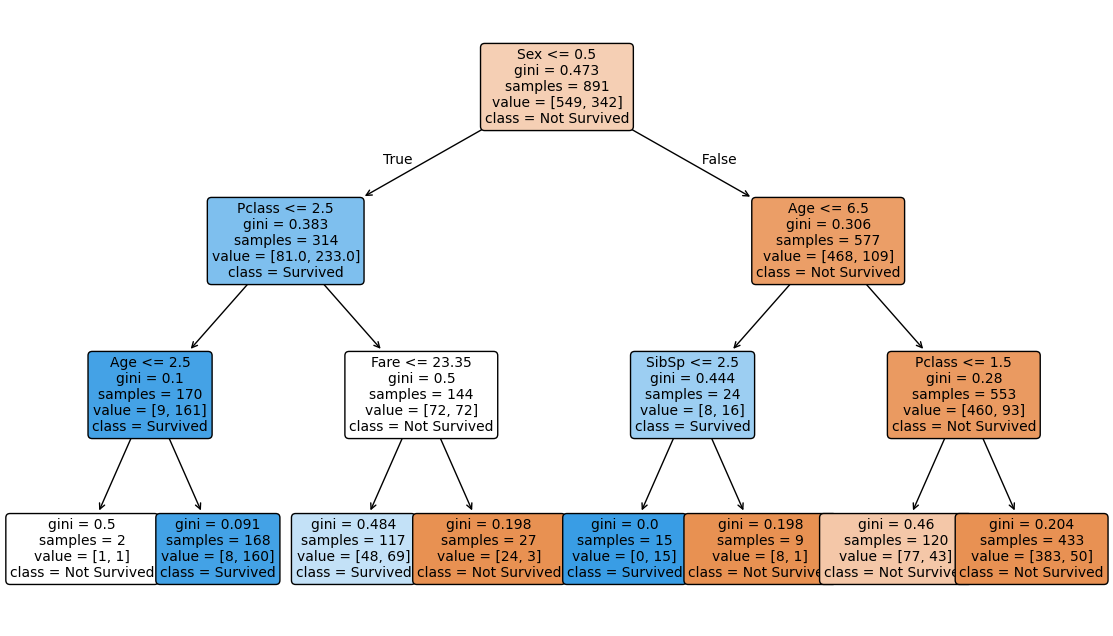

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline
plt.figure(figsize=(14,8))
plot_tree(model,
          feature_names=df.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [6]:
t=pd.read_csv('Desktop/testtitanic.csv')
t=t.drop(['Cabin','Ticket','Name'],axis='columns')
t['Sex']=lsex.transform(t['Sex'])
t['Embarked']=lemb.transform(t['Embarked'])
b=model.predict(t)
model.score(t,b)

1.0